# Applied convolutional neural networks with Keras

Convolutional neural networks (or ConvNets for short) are a special type of networks that have proved to be effective solving problems in computer vision such as image classification, object detection, face recognition, and much more.

![Object detection example](images/faster-rcnn.png)

Before we start with ConvNets, let’s briefly talk about images in computers.


# Image representation

![Three channels in an image](images/image-3channels.png)
Inside a computer’s memory, images are a sequence of pixel values. A pixel in a standard colored image has three number representing the intensity of the colors red, green and blue for that pixel, with 0 representing absence of that color and 255 is maximum intensity. Each one of these color components are called channels. For working with images inside programs, we can also see them as three stacked matrices, where each matrix has the pixel intensities of each channel. For example, let’s zoom on one of the channels of the previous image:
![Zoom in image channel](images/image-zoom-matrix.png)
(Note that these numbers are not the real values, they’re merely illustrative). Grayscale images have just one channel, that's why I’ve drawn the previous matrix in black ;) If we do the same for all three channels, we’d see three matrices instead:
![All channels matrix](images/image-matrix-3channels.png)

# The convolution operation
ConvNets get their name from a mathematical operation called **convolution**, which takes an image and another set of matrices (called **filter** or **kernel**) and produces another image as output. The primary purpose is to extract certain features from the image, the features extracted are dictated by the filter used. Let’s walk through an example of a convolution:
![Convolution setup](images/conv-1c-1.png)
Here we have a $6 \times 6$ (single channel) image being convolved with a $3 \times 3$ filter. This will produce a $4 \times 4$ output image.
![Convolution 1st step](images/conv-1c-2.png)
To apply the convolution we put the filter over the image—in the upper-left corner, do an element-wise multiplication of the filter and the image section being overlaid and sum all these values. We put the result of this computation in the first element of the output image.
![Convolution 2nd step](images/conv-1c-3.png)
(You can verify that $3*1 + 0*0 + 1*(-1) + 1*1 + 5*0 + 8*(-1) + 2*1 + 7*0 + 2*(-1) = -5$). Next, we move the kernel one to the left and perform the same element-wise product and sum.
![Convolution 3rd step](images/conv-1c-4.png)
We continue with the process until we hit the right edge of the image.
![Convolution 4th step](images/conv-1c-5.png)
![Convolution 5th step](images/conv-1c-6.png)
Now, we wrap back to the left side of the image, but go down by one element.
![Convolution 6st step](images/conv-1c-7.png)
You can see how the rest of the convolution is computed, so here’s the final result.
![Convolution final result](images/conv-1c-8.png)

## Padding

As you can see, the image’s size is reduced after performing a convolution. Sometimes we want to keep the same height and width in the output image. For this we just have to surround the input images with zeroes, so that center of the filter matches the upper-left pixel of the image in the first operation. This is called **padding**.
![Zero padding](images/padding.png)
A convolution that reduces the size of the input image is usually called a "valid" convolution, while one that preserves the input size is called a "same" convolution.

## Stride

We’ve moved the filter over the image one pixel at a time, but we could have skipped over pixels and move the filter 2 or 3 positions over. This "step size" is called the **stride** of the convolution, and it can control by how much you reduce the size of the input image.

## Multiple-channel inputs

We showed a convolution for a single channel image, but what if we have multiple channels, like in a color image?
![Convolution for 3-channels setup](images/conv-3c-1.png)
Say we want to convolve this image with a $3 \times 3$ filter, there’s a catch though. By convention, the image and the filter must have the same number of channels, so the filter would really be $3 \times 3 \times 3$. This convolution produces a $4 \times 4$ output image.
![Convolution for 3-channels 1st step](images/conv-3c-2.png)
The computation is very similar. We overlay the filter volume in the upper-left corner of the image and compute the same element-wise product + sum operation.
![Convolution for 3-channels 2nd step](images/conv-3c-3.png)
Same as before, we also move the filter through the image (in this case, with a stride of 1).
![Convolution for 3-channels 3rd step](images/conv-3c-4.png)
![Convolution for 3-channels 4th step](images/conv-3c-5.png)
The computation goes the same as before until we go through the whole image.

## Multiple-channel output

We’re still producing single channel outputs, what if we want a color image as an output? Or even more that three channels? This is done by performing multiple convolutions for the same input image.
![Convolution for 3-channels two output channel setup](images/conv-3c-6.png)
Here we are convolving a $6 \times 6 \times 3$ image with two different filters, both $3 \times 3 \times 3$, and producing two single channel $4 \times 4$ outputs. We can get a two channel output image by stacking these two results, making the overall output a $4 \times 4 \times 2$ image.
![Convolution for 3-channels two output channel step](images/conv-3c-7.png)

## Convolution summary

A convolution is an operation that takes a $h \times w \times c$ input image, $n_f$ filters of $f \times f \times c$ and together with a stride $s$ and padding $p$ computes an output image of size
$$\left( \left\lfloor \frac{h + 2p - f}{s} \right\rfloor +1 \right) \times \left( \left\lfloor \frac{w + 2p - f}{s} \right\rfloor + 1 \right) \times  n_f$$

# ConvNets

Now that we know about convolutions we can talk about ConvNets!

## Convolutional layers

Same as regular neural networks, ConvNets are made out of layers. Each layer has a set of parameters—for ConvNets this is a filter—and performs a convolution with its input and its filter, then it applies a non-linear **activation** function (usually ReLU). This is the output of the layer and the input of the next layer.

![ConvNet layer](images/convnet-layer.png)

Then we can connect multiple layers in sequence. This can be seen as transforming an input image over and over into an useful representation for some problem, and the job of the ConvNet is to learn these transformations.

![Simple ConvNet](images/simple-convnet.png)

## Fully connected layers

For example if we'd like to check if an image is one of $n$ classes (e.g. dog, cat, plane, car, ...), we can use a ConvNet to transform the image into an useful representation, then **flatten** it's final convolutional layer and feed it to a regular neural network (in this context called fully convolutional (FC) or dense  layers) in order to make the final decision of which class does the image belong to.

![Fully connected layer](images/convnet-fc.png)

In classification the last layer's activation is usually logistic for binary classification and softmax for multi-class 
classification, and a linear activation for regression.

## Pooling layers

In a ConvNet sometimes we want to reduce the size (or downsample) of an image without changing it's number of channels or adding parameters that need to be learned. This can be achieved throgh **pooling** layers. Say we have a $4 \times 4$ image and we want to cut its size by half.
![Pooling setup](images/pooling-1.png)
We can take a $2 \times 2$ area in the upper-left corner of the image and put the *maximum* value of this section in the firts positon of the output image.
![Pooling step 1](images/pooling-2.png)
Now, we can move the window 2 positions over to the right and, same as before, put the maximum value inside the window in the naxt postion of the output image.
![Pooling step 2](images/pooling-3.png)
The rest of the computation is similar.
![Pooling step 3](images/pooling-4.png)
We can see that the way we move the window is similar to how we move the filter in a convolution. In pooling layers the stride is usually the same as the window's size, but this can be changed as well. Another parameter of this layer is the type of pooling, here we picked the maximum value of the window, but you can also take the average or the sum.

# CIFAR10 small image classification

Now that we know the basics of ConvNets it's time to try them out! We'll train a ConvNet to classify a $32 \times 32$ color image in 10 different classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck). The dataset we'll use is called CIFAR10.

We'll use the deep learning library for Python called Keras, which provides a high-level API to scientific calculation frameworks like Tensorflow or Theano. Keras also comes with a bunch of utilities and datasets, including CIFAR10. We'll also use Numpy, a linear algebra library.

In the code below we load the dataset, normalize the images to the range [0, 1] (this speeds up training) and set-up the training, validation and test sets.

In [1]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

num_classes = 10
img_height = 32
img_width = 32

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

x_val = x_test[:5000, ...]
x_test = x_test[5000:, ...]
y_val = y_test[:5000, ...]
y_test = y_test[5000:, ...]

print('x_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)
print('x_test shape:', x_test.shape)

/home/cluster/Tests/fashion-mnist/env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
x_val shape: (5000, 32, 32, 3)
x_test shape: (5000, 32, 32, 3)


# Visualizing the data

Using Matplotlib, we can visualize som eof the images in the dataset.

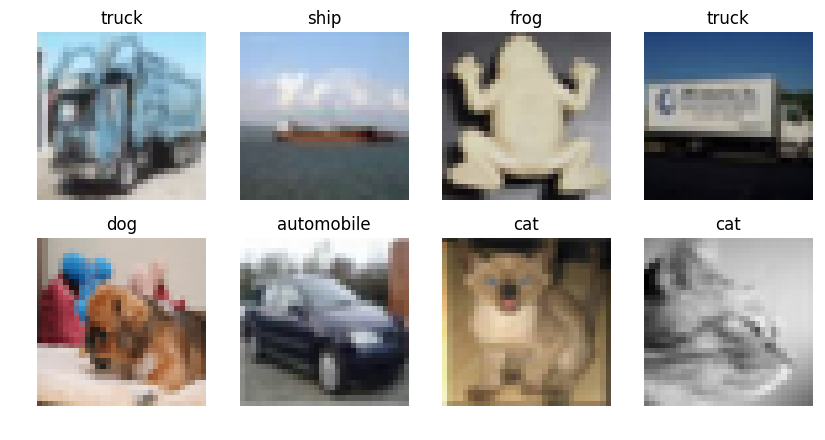

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

img_count = 1
plt.figure(figsize=(10, 5), dpi=100)
for i in range(2):
    for j in range(4):
        idx = np.random.randint(0, x_train.shape[0])
        plt.subplot(2, 4, img_count)
        plt.imshow(np.squeeze(x_train[idx, ...]))
        plt.title(classes[np.argmax(y_train[idx, ...])])
        plt.axis('off')
        img_count += 1

As you can see, the "tiny image classification" is an accurate name for CIFAR10.

# Building our first ConvNet, using Keras

Keras allows us to define a neural network through its different layers, abstracting away things like convolution and matrix operations. The most common type of model in Keras is the `Sequential` model, which is a succesion of layers. We'll us ethe following layers:

- `Conv2D` to perform convolutions. The parameters of this layers are the number of filters, the size of the filters, the type of padding and the activation function.
- `MaxPooling2D` is a pooling layer that take sthe maximum value of its window. We need to specify the size of the window, by default the stride is the same as the window size, but you can change that.
- `Flatten` to convert the output of the last convolutional layer to an array, so that we can feed it to a fully connected layer later on.
- `Dense` defines a fully connected layer. We need to give it the number of units and the activation function.

Note that in the first layer we specify the shape of the input, which is a color image.

After defining the model we can take a look at its layers using `model.summary`.

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv1_1',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv1_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool1'))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2_1'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool2'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu', name='fc3'))
model.add(layers.Dense(num_classes, activation='softmax', name='fc4'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        896       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
__________

# Training the model

We can now train our ConvNet! We define the number of images the modle will see at a time (`batch_size`) and the number of times it'll  look at the whole dataset (`epochs`). After that we "compile" the model, telling it what quantity to minimize (since we're doing multi-class classification, we should use `categorical_crossentropy`) and which optimization algorithm to use (in this case we'll use the `adam` optimizer).

We'll also monitor the accuracy of the model both in the training and in the validation sets.

In [4]:
batch_size = 32
epochs = 30

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

history = model.fit(x_train, y_train, 
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 5000 samples
Epoch 1/30
50000/50000 [==============================] - 13s 259us/step - loss: 1.3568 - acc: 0.5089 - val_loss: 1.0691 - val_acc: 0.6320
Epoch 2/30
50000/50000 [==============================] - 11s 225us/step - loss: 0.8892 - acc: 0.6886 - val_loss: 0.8567 - val_acc: 0.7038
Epoch 3/30
50000/50000 [==============================] - 11s 218us/step - loss: 0.6827 - acc: 0.7611 - val_loss: 0.7727 - val_acc: 0.7374
Epoch 4/30
50000/50000 [==============================] - 11s 218us/step - loss: 0.5202 - acc: 0.8165 - val_loss: 0.8107 - val_acc: 0.7374
Epoch 5/30
50000/50000 [==============================] - 11s 218us/step - loss: 0.3750 - acc: 0.8683 - val_loss: 0.8528 - val_acc: 0.7396
Epoch 6/30
50000/50000 [==============================] - 11s 219us/step - loss: 0.2568 - acc: 0.9095 - val_loss: 1.0469 - val_acc: 0.7386
Epoch 7/30
50000/50000 [==============================] - 11s 219us/step - loss: 0.1784 - acc: 0.9379 - val_loss: 1.2

Keras gives us a summary of the training at each epoch, but it'd me better to see this visually.

# Checking the model's performance

We'll plot how the modle did at each epoch both in the training and in the validation sets usging Matplotlib again.

In [5]:
def plot_history(history):
    scores = history.history

    plt.figure(figsize=(10, 5), dpi=100)
    plt.subplots_adjust(wspace=0.5)

    plt.subplot(1, 2, 1)
    plt.title('Loss history')
    plt.plot(scores['loss'], 'b-', label='Training loss')
    plt.plot(scores['val_loss'], 'r-', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('Accuracy history')
    plt.plot(scores['acc'], 'b-', label='Training accuracy')
    plt.plot(scores['val_acc'], 'r-', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()

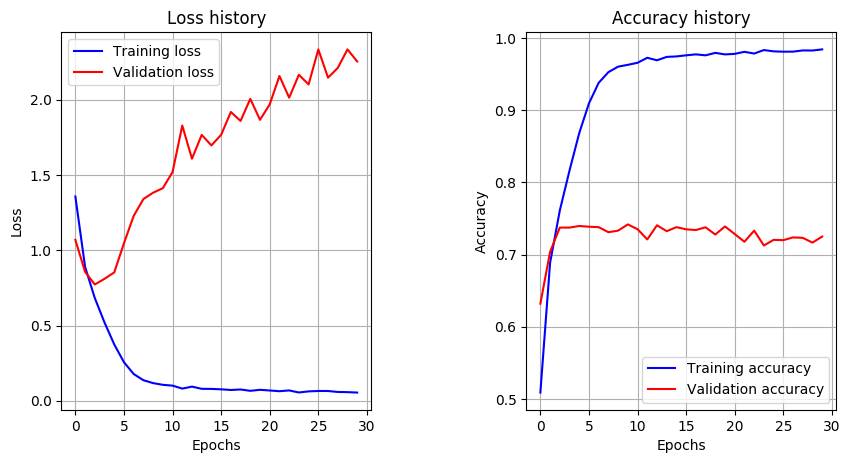

In [6]:
plot_history(history)

These two graphs tell us that the model did really well on the training set, the loss went down and the accuracy up at each epoch. However, this is not the case for the validation set.

We can interpret this as the model "memorizing" the images and theis classes on the training set (i.e. when it was studying) and not generalizing well no unseen images (i.e. it failed the the exam). This is called overfitting, it's a common problem in machine learning, and we have a few ways to handle it.

# Dropout

Dropout is a technique to mitigate overfitting. The idea is to randomly disable some of the activations of a layer.

![Dropout layer](images/dropout.png)

The above image shows two possible ways we can disable the activations of a fully connected layer. The intuition is that this will make the layers more independant from eachother.

In Keras we can use the `Dropout` layer and specify the rate of units that will be randomly disabled.

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv1_1',
                        input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', name='conv1_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool1'))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2_1'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2_2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), name='max_pool2'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu', name='fc3'))
model.add(layers.Dropout(0.5, name='dropout3'))
model.add(layers.Dense(num_classes, activation='softmax', name='fc4'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 32)        896       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
__________

# Image augmentation

Another useful technique is image augmentation, in which we produce new training images by randomly perturbing the training set. These perturbations can be moving, flipping, rotating, shearing, and more.

Keras can perform these operations for us in real time using `ImageDataGenerator`.

In [26]:
from keras import preprocessing

datagen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True)  # randomly flip images
datagen.fit(x_train)

Having applied these techniques, we'll train the model again. Since out dataset is now bigger due to image augmentation, we'll increase the number of epochs.

In [27]:
batch_size = 32
epochs = 60

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

history = model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_val, y_val))

Epoch 1/60
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5633 - acc: 0.4290 - val_loss: 1.1877 - val_acc: 0.5762
Epoch 2/60
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1913 - acc: 0.5741 - val_loss: 0.9819 - val_acc: 0.6516
Epoch 3/60
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0323 - acc: 0.6367 - val_loss: 0.9149 - val_acc: 0.6878
Epoch 4/60
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9486 - acc: 0.6692 - val_loss: 0.7981 - val_acc: 0.7234
Epoch 5/60
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8865 - acc: 0.6893 - val_loss: 0.7523 - val_acc: 0.7418
Epoch 6/60
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8465 - acc: 0.7015 - val_loss: 0.7641 - val_acc: 0.7348
Epoch 7/60
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8221 - acc: 0.7147 - val_loss: 0.7074 - val_acc: 0.7618
Epoch 8/60
1563/1563 [==========================

Let's evaluate again the model's performance at each epoch.

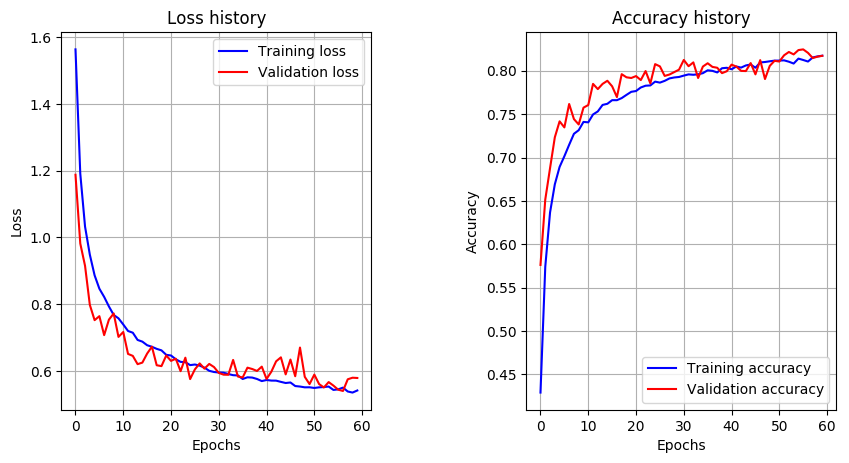

In [28]:
plot_history(history)

These are much more promising results!

# Testing the model in unseen images

To conlude, it's important see how the model does on images it has never seen. This is why we put aside a test set.

In [29]:
_, test_acc = model.evaluate(x_test, y_test, verbose=False)
print('Test accuracy:', test_acc)

Test accuracy: 0.8172


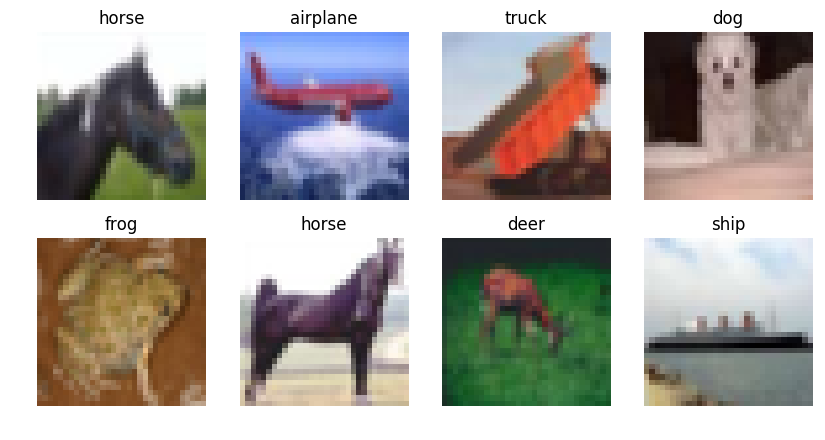

In [33]:
img_count = 1
plt.figure(figsize=(10, 5), dpi=100)
for i in range(2):
    for j in range(4):
        idx = np.random.randint(0, x_test.shape[0])
        x = np.expand_dims(x_test[idx, ...], axis=0)
        y = np.squeeze(model.predict(x))
        plt.subplot(2, 4, img_count)
        plt.imshow(np.squeeze(x))
        plt.title(classes[np.argmax(y)])
        plt.axis('off')
        img_count += 1